## Pandas_DataReader

In [81]:
! pip install pandas-datareader

    100% |████████████████████████████████| 81kB 315kB/s ta 0:00:01
  Running setup.py bdist_wheel for requests-ftp ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/76/fb/0d/1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
  Running setup.py bdist_wheel for requests-file ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/3e/34/3a/c2e634ca7b545510c1b3b7d94dea084e5fdb5f33558f3c3a81
Successfully built requests-ftp requests-file


In [88]:
import pandas_datareader
fb = pandas_datareader.get_data_yahoo('FB')

Populating the interactive namespace from numpy and matplotlib


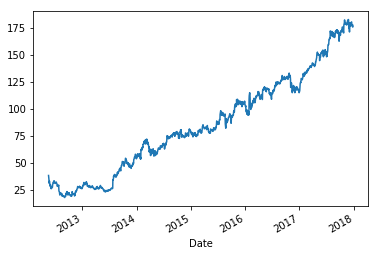

In [90]:
% pylab inline
fb['Close'].plot(kind = 'line')

## 讀取Google 股價

In [91]:
import pandas
dataset_train = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/fuboni/master/data/Google_Stock_Price_Train.csv')

In [92]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Populating the interactive namespace from numpy and matplotlib


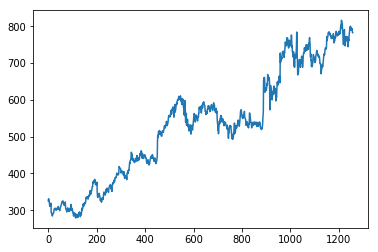

In [100]:
% pylab inline
dataset_train['Open'].plot(kind = 'line')

In [96]:
dataset_train.count()

Date      1258
Open      1258
High      1258
Low       1258
Close     1258
Volume    1258
dtype: int64

In [94]:
training_set = dataset_train.iloc[:, 1:2].values

In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [101]:
training_set_scaled

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [102]:
len(training_set_scaled)

1258

In [106]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [108]:
len(X_train)
len(y_train)

1198

In [109]:
X_train.shape

(1198, 60)

In [110]:
y_train.shape

(1198,)

In [111]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [113]:
X_train.shape

(1198, 60, 1)

In [116]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

In [117]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [125]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0621
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0070
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0060
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0049
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [==============================] - 5s 5ms/step - lo

In [127]:
dataset_test = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/fuboni/master/data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [128]:
real_stock_price

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08],
       [ 805.81],
       [ 805.12],
       [ 806.91],
       [ 807.25],
       [ 822.3 ],
       [ 829.62],
       [ 837.81],
       [ 834.71],
       [ 814.66],
       [ 796.86]])

In [155]:
dataset_total = pandas.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total.tail(30)


1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, dtype: float64

In [133]:
len(dataset_train)

1258

In [141]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [142]:
len(inputs)

80

In [143]:
inputs.shape

(80,)

In [144]:
inputs = inputs.reshape(-1,1)

In [145]:
inputs.shape

(80, 1)

In [146]:
inputs = sc.transform(inputs)

In [154]:
inputs[0:3]

array([[ 0.9299055 ],
       [ 0.93113327],
       [ 0.92750577]])

In [148]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [149]:
X_test = np.array(X_test)

In [151]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [152]:
X_test.shape

(20, 60, 1)

In [156]:
predicted_stock_price = regressor.predict(X_test)

In [157]:
predicted_stock_price

array([[ 0.9269613 ],
       [ 0.92157173],
       [ 0.92213631],
       [ 0.92509484],
       [ 0.93164253],
       [ 0.94284141],
       [ 0.95284832],
       [ 0.95647573],
       [ 0.95650578],
       [ 0.95573902],
       [ 0.95537198],
       [ 0.95519388],
       [ 0.95513391],
       [ 0.95627141],
       [ 0.95805633],
       [ 0.96676397],
       [ 0.97983253],
       [ 0.99358225],
       [ 1.00038433],
       [ 0.99124742]], dtype=float32)

In [158]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [159]:
predicted_stock_price

array([[ 777.41729736],
       [ 774.52008057],
       [ 774.82354736],
       [ 776.41394043],
       [ 779.93371582],
       [ 785.95379639],
       [ 791.33312988],
       [ 793.28308105],
       [ 793.29919434],
       [ 792.88702393],
       [ 792.6897583 ],
       [ 792.59399414],
       [ 792.56176758],
       [ 793.17321777],
       [ 794.13275146],
       [ 798.81359863],
       [ 805.83874512],
       [ 813.2300415 ],
       [ 816.88659668],
       [ 811.97491455]], dtype=float32)

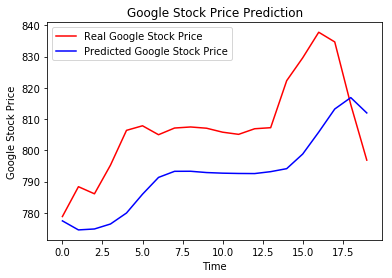

In [160]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [163]:
predicted_stock_price2 = regressor.predict(X_train)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)
real_stock_price2 = training_set

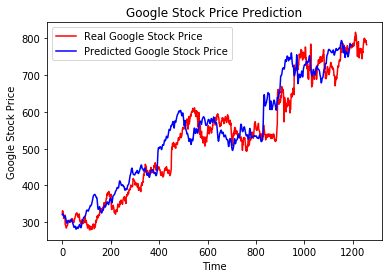

In [164]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price2, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price2, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()